Counting missing values in each column:
Date                                0
City                                0
Location                            0
Rainfall (mm)                       0
Previous 24-hour Rainfall (mm)      0
Humidity (%)                        0
Temperature (°C)                    0
Dew Point (°C)                      0
Wind Speed (km/h)                   0
Air Pressure (hPa)                  0
Cloud Cover (%)                     0
Soil Moisture (%)                   0
Evaporation Rate (mm/day)           0
Elevation (m)                       0
Land Use                            0
Drainage System Efficiency          0
Storm Intensity                     0
Sea Level Height (m)              516
Flood Severity                      0
dtype: int64

Visualizing missing values with a heatmap:


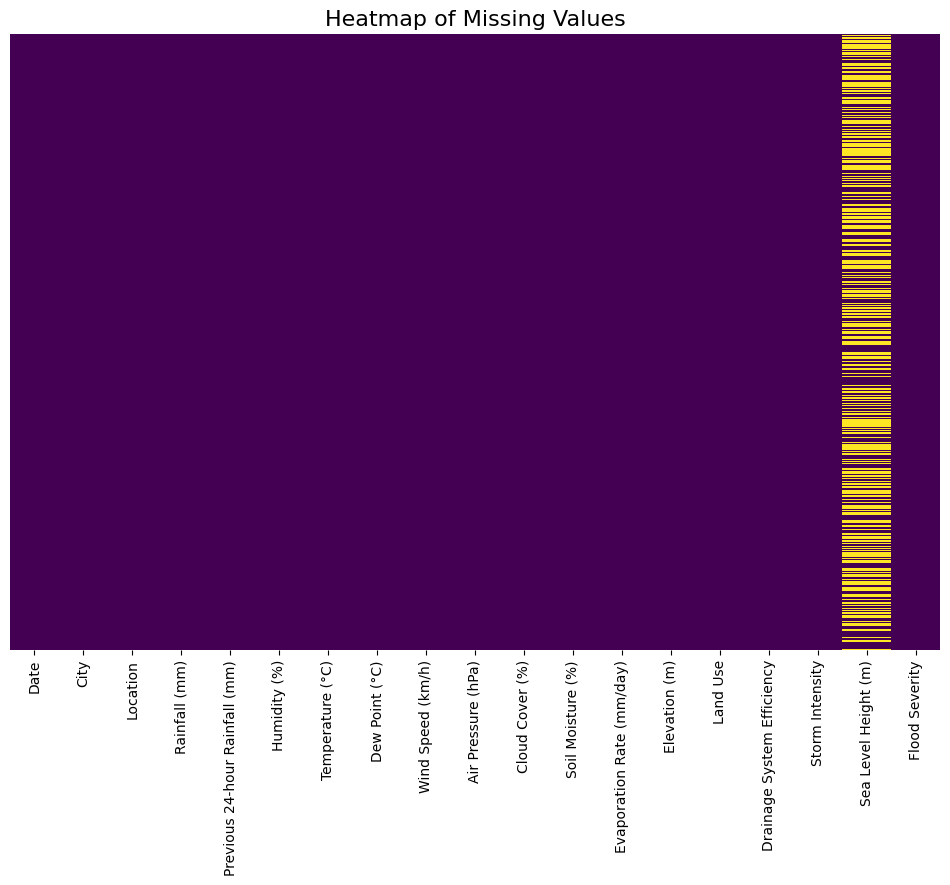

Original shape of the dataframe: (1000, 19)
Column 'Sea Level Height (m)' has been successfully dropped.
New shape of the dataframe: (1000, 18)
Re-checking for missing values after dropping the column:
Date                              0
City                              0
Location                          0
Rainfall (mm)                     0
Previous 24-hour Rainfall (mm)    0
Humidity (%)                      0
Temperature (°C)                  0
Dew Point (°C)                    0
Wind Speed (km/h)                 0
Air Pressure (hPa)                0
Cloud Cover (%)                   0
Soil Moisture (%)                 0
Evaporation Rate (mm/day)         0
Elevation (m)                     0
Land Use                          0
Drainage System Efficiency        0
Storm Intensity                   0
Flood Severity                    0
dtype: int64

Great! There are no more missing values in the dataset.
Original data types:
Date                               object
City             

C:\Users\LOQ\AppData\Local\Temp\ipykernel_19748\2421604715.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month', data=df, palette='cubehelix')


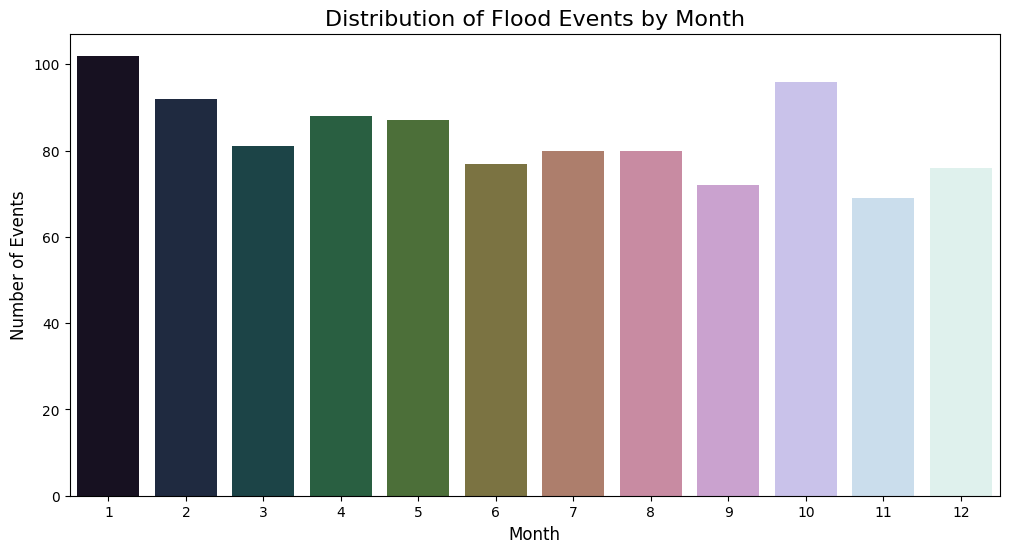

Successfully dropped the following columns: ['Date', 'Location']

First 5 rows of the updated dataframe:
Column 'Day' has been successfully dropped.

Current columns in the dataframe:
Index(['City', 'Rainfall (mm)', 'Previous 24-hour Rainfall (mm)',
       'Humidity (%)', 'Temperature (°C)', 'Dew Point (°C)',
       'Wind Speed (km/h)', 'Air Pressure (hPa)', 'Cloud Cover (%)',
       'Soil Moisture (%)', 'Evaporation Rate (mm/day)', 'Elevation (m)',
       'Land Use', 'Drainage System Efficiency', 'Storm Intensity',
       'Flood Severity', 'Year', 'Month'],
      dtype='object')
Original unique values:
Drainage System Efficiency: ['Excellent' 'Poor' 'Moderate' 'Good']
Storm Intensity: ['Light' 'Severe' 'Moderate']

Dataframe after Ordinal Encoding:
Dataframe shape before One-Hot Encoding: (1000, 18)
Dataframe shape after One-Hot Encoding: (1000, 27)

First 5 rows of the updated dataframe:
Original unique values for Flood Severity:
['Moderate' 'Severe' 'Extreme' 'Low']

Flood Severity 

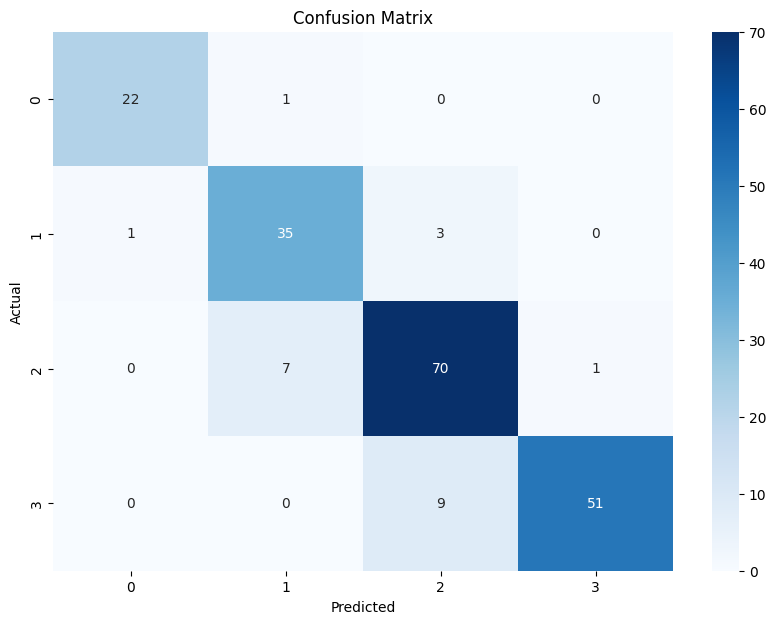

C:\Users\LOQ\AppData\Local\Temp\ipykernel_19748\2421604715.py:180: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_features, palette='plasma')


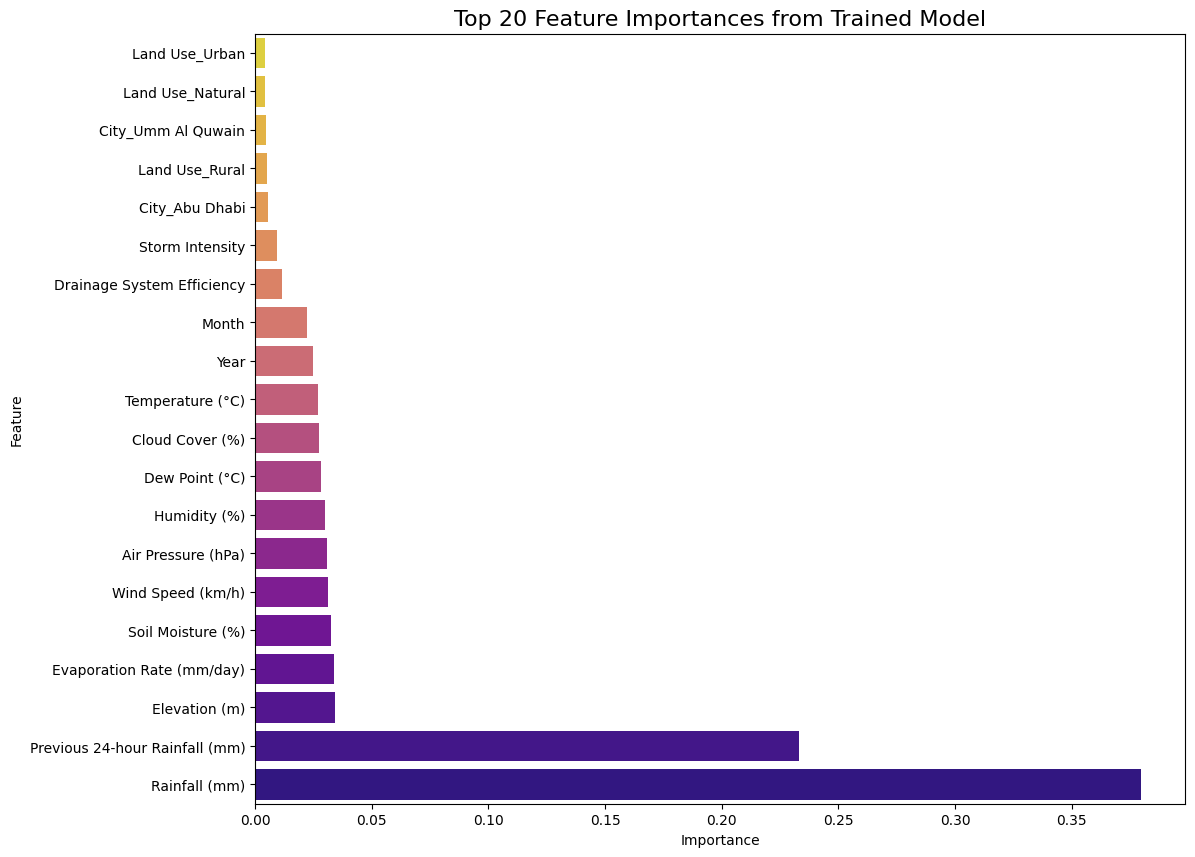

The top 15 selected features are:
['Rainfall (mm)', 'Previous 24-hour Rainfall (mm)', 'Elevation (m)', 'Evaporation Rate (mm/day)', 'Soil Moisture (%)', 'Wind Speed (km/h)', 'Air Pressure (hPa)', 'Humidity (%)', 'Dew Point (°C)', 'Cloud Cover (%)', 'Temperature (°C)', 'Year', 'Month', 'Drainage System Efficiency', 'Storm Intensity']

Shape of the new selected training data: (800, 15)


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


file_path = 'new enhanced dataset.xls' 
df = pd.read_excel(file_path, header=1)

print("Counting missing values in each column:")
print(df.isnull().sum())

print("\nVisualizing missing values with a heatmap:")
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Heatmap of Missing Values', fontsize=16)
plt.show()

print(f"Original shape of the dataframe: {df.shape}")

column_to_drop = 'Sea Level Height (m)'
df.drop(column_to_drop, axis=1, inplace=True)


print(f"Column '{column_to_drop}' has been successfully dropped.")
print(f"New shape of the dataframe: {df.shape}")

print("Re-checking for missing values after dropping the column:")
missing_values_after = df.isnull().sum()
print(missing_values_after)
if missing_values_after.sum() == 0:
    print("\nGreat! There are no more missing values in the dataset.")
else:
    print("\nThere are still some missing values to handle.")
# *Feature Engineering*

print("Original data types:")
print(df.dtypes)

# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])


df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

print("\nDataframe after adding new date features:")
df[['Date', 'Year', 'Month', 'Day']].head()

plt.figure(figsize=(12, 6))
sns.countplot(x='Month', data=df, palette='cubehelix')
plt.title('Distribution of Flood Events by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Events', fontsize=12)
plt.show()

columns_to_drop = ['Date', 'Location']
df.drop(columns_to_drop, axis=1, inplace=True)

print("Successfully dropped the following columns:", columns_to_drop)


print("\nFirst 5 rows of the updated dataframe:")
df.head()

column_to_drop = 'Day'
if column_to_drop in df.columns:
    df.drop(column_to_drop, axis=1, inplace=True)
    print(f"Column '{column_to_drop}' has been successfully dropped.")
else:
    print(f"Column '{column_to_drop}' was not found.")

print("\nCurrent columns in the dataframe:")
print(df.columns)

print("Original unique values:")
print("Drainage System Efficiency:", df['Drainage System Efficiency'].unique())
print("Storm Intensity:", df['Storm Intensity'].unique())

efficiency_mapping = {'Poor': 0, 'Moderate': 1, 'Good': 2, 'Excellent': 3}
intensity_mapping = {'Light': 0, 'Moderate': 1, 'Severe': 2}


df['Drainage System Efficiency'] = df['Drainage System Efficiency'].map(efficiency_mapping)
df['Storm Intensity'] = df['Storm Intensity'].map(intensity_mapping)


print("\nDataframe after Ordinal Encoding:")
df[['Drainage System Efficiency', 'Storm Intensity']].head()

print("Dataframe shape before One-Hot Encoding:", df.shape)


columns_to_encode = ['City', 'Land Use']
df = pd.get_dummies(df, columns=columns_to_encode, prefix=columns_to_encode)


print("Dataframe shape after One-Hot Encoding:", df.shape)
print("\nFirst 5 rows of the updated dataframe:")
df.head()

print("Original unique values for Flood Severity:")
print(df['Flood Severity'].unique())

severity_mapping = {'Low': 0, 'Moderate': 1, 'Severe': 2, 'Extreme': 3}
df['Flood Severity'] = df['Flood Severity'].map(severity_mapping)


print("\nFlood Severity column after CORRECT mapping:")
print(df['Flood Severity'].value_counts())


print(f"\nTotal count of mapped values: {df['Flood Severity'].value_counts().sum()}")
# *Baseline Model*

from sklearn.model_selection import train_test_split


# X contains all columns except the target
X = df.drop('Flood Severity', axis=1)
# y contains only the target column
y = df['Flood Severity']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42, 
    stratify=y 
)


print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(n_estimators=100, random_state=42)


model.fit(X_train, y_train)


print("Model training completed successfully!")
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns


y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")
print("-" * 50)

print("Classification Report:")
print(classification_report(y_test, y_pred))
print("-" * 50)


print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

importances = model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

top_n = 20
top_features = feature_importance_df.head(top_n)


plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=top_features, palette='plasma')
plt.title(f'Top {top_n} Feature Importances from Trained Model', fontsize=16)
plt.gca().invert_yaxis()
plt.show()

# Let's select the top 15 features based on the previous feature importance chart
top_n_features = 15
selected_feature_names = feature_importance_df.head(top_n_features)['Feature'].tolist()


print(f"The top {top_n_features} selected features are:")
print(selected_feature_names)

X_train_selected = X_train[selected_feature_names]
X_test_selected = X_test[selected_feature_names]


print("\nShape of the new selected training data:", X_train_selected.shape)

In [2]:
import pandas as pd

# Define the correct path to the original Excel file
original_file_path = 'new enhanced dataset.xls'
# Define the path for the new, final CSV dataset
new_file_path = 'flood_prediction_selected_features.csv'

print(f"Loading the original Excel dataset from: {original_file_path}")
try:
    # Read the Excel file, using header=1 to correctly set the column names from the second row
    df = pd.read_excel(original_file_path, header=1)
except FileNotFoundError:
    print(f"Error: The file '{original_file_path}' was not found.")
    print("Please make sure the uploaded file is in the same directory.")
    exit()

# Define the list of features we need from the source file.
features_to_extract = [
    'Date',
    'Rainfall (mm)',
    'Previous 24-hour Rainfall (mm)',
    'Elevation (m)',
    'Wind Speed (km/h)',
    'Air Pressure (hPa)',
    'Humidity (%)',
    'Dew Point (°C)',
    'Cloud Cover (%)',
    'Temperature (°C)',
    'Flood Severity'
]

print("\nExtracting necessary columns...")
# Create an intermediate DataFrame with only the columns we need.
df_intermediate = df[features_to_extract].copy()

print("Creating the 'Month' feature from the 'Date' column...")
# Convert the 'Date' column to datetime objects to safely extract the month
df_intermediate['Date'] = pd.to_datetime(df_intermediate['Date'], errors='coerce')
# Create the 'Month' column
df_intermediate['Month'] = df_intermediate['Date'].dt.month

print("Renaming 'Flood Severity' to 'Flood' for consistency...")
# Rename the target column to match our plan
df_intermediate.rename(columns={'Flood Severity': 'Flood'}, inplace=True)

# Define the final order of columns for the new dataset
final_feature_order = [
    'Rainfall (mm)',
    'Previous 24-hour Rainfall (mm)',
    'Elevation (m)',
    'Wind Speed (km/h)',
    'Air Pressure (hPa)',
    'Humidity (%)',
    'Dew Point (°C)',
    'Cloud Cover (%)',
    'Temperature (°C)',
    'Month',
    'Flood'
]

# Create the final DataFrame with the correct columns in the correct order
df_final = df_intermediate[final_feature_order]

print(f"\nSaving the final dataset to: {new_file_path}")
# Save the final DataFrame to the new CSV file
df_final.to_csv(new_file_path, index=False)

print("\nProcess complete. The final dataset for our model is ready.")
print("Here are the first 5 rows of the new dataset:")
# Display the first few rows of the final dataset to confirm
print(df_final.head())

Loading the original Excel dataset from: new enhanced dataset.xls

Extracting necessary columns...
Creating the 'Month' feature from the 'Date' column...
Renaming 'Flood Severity' to 'Flood' for consistency...

Saving the final dataset to: flood_prediction_selected_features.csv

Process complete. The final dataset for our model is ready.
Here are the first 5 rows of the new dataset:
   Rainfall (mm)  Previous 24-hour Rainfall (mm)  Elevation (m)  \
0           60.5                            27.0         106.82   
1          175.7                           109.7         143.28   
2          293.2                           124.6         147.29   
3          192.8                           124.9          21.02   
4           99.8                            49.0         107.48   

   Wind Speed (km/h)  Air Pressure (hPa)  Humidity (%)  Dew Point (°C)  \
0               73.3              1005.3          51.7            25.2   
1               67.4              1012.1          50.2         

In [3]:
import pandas as pd

# Define the path to the dataset we created in the last step
file_path = 'flood_prediction_selected_features.csv'

print(f"Loading the dataset from: {file_path}")
try:
    df = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    exit()

# Define a function to create the descriptive text for each row
def create_text_description(row):
    """
    This function takes a row of the DataFrame and creates a unified
    text description based on its feature values.
    """
    description = (
        f"Meteorological report for the month number {int(row['Month'])}: "
        f"Current rainfall is {row['Rainfall (mm)']} mm, with {row['Previous 24-hour Rainfall (mm)']} mm in the last 24 hours. "
        f"The location elevation is {row['Elevation (m)']} meters. "
        f"Current conditions show a temperature of {row['Temperature (°C)']}°C, "
        f"humidity at {row['Humidity (%)']}%, and wind speed of {row['Wind Speed (km/h)']} km/h. "
        f"Air pressure is {row['Air Pressure (hPa)']} hPa, with {row['Cloud Cover (%)']}% cloud cover "
        f"and a dew point of {row['Dew Point (°C)']}°C."
    )
    return description

print("\nGenerating the 'Text_Description' column...")
# Apply the function to each row of the DataFrame to create the new column.
# axis=1 ensures that the function is applied row-wise.
df['Text_Description'] = df.apply(create_text_description, axis=1)

print(f"\nSaving the updated dataset back to: {file_path}")
# Save the DataFrame with the new text column back to the same file.
df.to_csv(file_path, index=False)

print("\nProcess complete. The 'Text_Description' column has been added.")
print("\nHere is a sample of the first row with its new description:")

# Display the features and the new text description for the first row
pd.set_option('display.max_colwidth', None) # To display the full text
print(df.head(1).to_string())

Loading the dataset from: flood_prediction_selected_features.csv

Generating the 'Text_Description' column...

Saving the updated dataset back to: flood_prediction_selected_features.csv

Process complete. The 'Text_Description' column has been added.

Here is a sample of the first row with its new description:
   Rainfall (mm)  Previous 24-hour Rainfall (mm)  Elevation (m)  Wind Speed (km/h)  Air Pressure (hPa)  Humidity (%)  Dew Point (°C)  Cloud Cover (%)  Temperature (°C)  Month     Flood                                                                                                                                                                                                                                                                                                                     Text_Description
0           60.5                            27.0         106.82               73.3              1005.3          51.7            25.2               12              27.2      1  Mo

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Define the path to our fully prepared dataset
file_path = 'flood_prediction_selected_features.csv'

print(f"Loading the final dataset from: {file_path}")
df = pd.read_csv(file_path)

# Separate the features (X) from the target variable (y)
# X contains all columns EXCEPT 'Flood'
X = df.drop('Flood', axis=1)
# y contains ONLY the 'Flood' column
y = df['Flood']

# Split the data into training and testing sets
# test_size=0.2 means we'll use 20% of the data for testing
# random_state=42 ensures that we get the same split every time we run the code
# stratify=y is crucial for imbalanced datasets. It ensures that the proportion
# of each class ('Severe', 'Moderate', etc.) is the same in both the training
# and testing sets as it is in the original dataset.
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("\nData splitting complete.")
print(f"Shape of the training features (X_train): {X_train.shape}")
print(f"Shape of the testing features (X_test): {X_test.shape}")

print("\nDistribution of the target variable in the original dataset:")
print(y.value_counts(normalize=True))

print("\nDistribution of the target variable in the training set (y_train):")
print(y_train.value_counts(normalize=True))

print("\nDistribution of the target variable in the testing set (y_test):")
print(y_test.value_counts(normalize=True))

# Optional: Save the split datasets to separate files for later use
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)
print("\nSplit datasets have been saved to separate CSV files.")

Loading the final dataset from: flood_prediction_selected_features.csv

Data splitting complete.
Shape of the training features (X_train): (800, 11)
Shape of the testing features (X_test): (200, 11)

Distribution of the target variable in the original dataset:
Flood
Severe      0.388
Extreme     0.302
Moderate    0.196
Low         0.114
Name: proportion, dtype: float64

Distribution of the target variable in the training set (y_train):
Flood
Severe      0.38750
Extreme     0.30250
Moderate    0.19625
Low         0.11375
Name: proportion, dtype: float64

Distribution of the target variable in the testing set (y_test):
Flood
Severe      0.390
Extreme     0.300
Moderate    0.195
Low         0.115
Name: proportion, dtype: float64

Split datasets have been saved to separate CSV files.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from transformers import BertModel, BertTokenizer
import torch
import pickle

# --- IMPORTANT: Define the path to your local BERT model directory ---
# Replace this with the actual path to the folder containing your model files.
# The '..' means 'go up one directory level'.
local_bert_path = 'D:\My-Projects\flood-severity\flood-prediction-system\notebooks\Bert_Model' 

# --- 1. Load the Split Data ---
print("Loading the training and testing sets...")
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')

# --- 2. Process Numerical Features ---
print("\nProcessing numerical features...")
numerical_cols = X_train.select_dtypes(include=np.number).columns.tolist()
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled = scaler.transform(X_test[numerical_cols])
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numerical_cols, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numerical_cols, index=X_test.index)

# --- 3. Process Text Features with Local BERT ---
print(f"\nProcessing text features using local BERT from: {local_bert_path}")
try:
    # Load tokenizer and model from the specified local path
    tokenizer = BertTokenizer.from_pretrained(local_bert_path)
    model = BertModel.from_pretrained(local_bert_path)
except OSError:
    print(f"Error: Could not find a valid model at '{local_bert_path}'.")
    print("Please make sure the path is correct and the folder contains 'pytorch_model.bin', 'config.json', and 'vocab.txt'.")
    exit()


def get_bert_embeddings(text_series):
    encoded_input = tokenizer(text_series.tolist(), padding=True, truncation=True, return_tensors='pt', max_length=128)
    with torch.no_grad():
        model_output = model(**encoded_input)
    embeddings = model_output.last_hidden_state.mean(dim=1)
    return embeddings.numpy()

X_train_bert_embeddings = get_bert_embeddings(X_train['Text_Description'])
X_test_bert_embeddings = get_bert_embeddings(X_test['Text_Description'])

# --- 4. Reduce BERT Embedding Dimensions with PCA ---
print("\nApplying PCA to reduce text feature dimensions...")
pca = PCA(n_components=5, random_state=42)
X_train_pca = pca.fit_transform(X_train_bert_embeddings)
X_test_pca = pca.transform(X_test_bert_embeddings)
pca_cols = [f'PCA_{i+1}' for i in range(X_train_pca.shape[1])]
X_train_pca_df = pd.DataFrame(X_train_pca, columns=pca_cols, index=X_train.index)
X_test_pca_df = pd.DataFrame(X_test_pca, columns=pca_cols, index=X_test.index)

# --- 5. Combine Processed Features ---
print("\nCombining processed numerical and text features...")
X_train_processed = pd.concat([X_train_scaled_df, X_train_pca_df], axis=1)
X_test_processed = pd.concat([X_test_scaled_df, X_test_pca_df], axis=1)

# --- 6. Save Everything ---
print("\nSaving the processed datasets and the fitted processors...")
X_train_processed.to_csv('X_train_processed.csv', index=False)
X_test_processed.to_csv('X_test_processed.csv', index=False)
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
with open('pca.pkl', 'wb') as f:
    pickle.dump(pca, f)

print("\nProcess complete.")
print("\nShape of final processed training data:", X_train_processed.shape)
print("First 5 rows of the processed training data:")
print(X_train_processed.head())

In [3]:
import pandas as pd
from imblearn.over_sampling import SMOTE
import pickle

# --- 1. Load the Processed Training Data and Original Labels ---
print("Loading the processed training features and original training labels...")
X_train_processed = pd.read_csv('X_train_processed.csv')
y_train = pd.read_csv('y_train.csv').squeeze() # .squeeze() converts it to a Series

print("\nClass distribution BEFORE balancing (SMOTE):")
print(y_train.value_counts())

# --- 2. Apply SMOTE to Balance the Training Data ---
print("\nApplying SMOTE to the training data...")
# Initialize SMOTE. random_state ensures reproducibility.
smote = SMOTE(random_state=42)

# Fit SMOTE and resample the training data
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_processed, y_train)

print("\nClass distribution AFTER balancing (SMOTE):")
print(y_train_balanced.value_counts())

# --- 3. Save the Balanced Datasets ---
print("\nSaving the balanced training datasets...")
# Save the new balanced features and labels
X_train_balanced.to_csv('X_train_balanced.csv', index=False)
y_train_balanced.to_csv('y_train_balanced.csv', index=False)

print("\nProcess complete.")
print("Shape of the balanced training features:", X_train_balanced.shape)

Loading the processed training features and original training labels...

Class distribution BEFORE balancing (SMOTE):
Flood
Severe      310
Extreme     242
Moderate    157
Low          91
Name: count, dtype: int64

Applying SMOTE to the training data...

Class distribution AFTER balancing (SMOTE):
Flood
Severe      310
Extreme     310
Low         310
Moderate    310
Name: count, dtype: int64

Saving the balanced training datasets...

Process complete.
Shape of the balanced training features: (1240, 15)
